In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

survey = pd.read_csv('masculinity.csv')

In [2]:
survey.head()

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [3]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [4]:
survey

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1185,5/19/18 7:50,5/19/18 8:00,Somewhat masculine,Not at all important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,Non-white,Other,Some college,Some college,35 - 64,No children,Gay/Bisexual,1.571755
1185,1186,5/19/18 7:52,5/19/18 8:03,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,...,New England,Windows Desktop / Laptop,White,White,High school or less,High school or less,35 - 64,Has children,Straight,2.446719
1186,1187,5/19/18 7:58,5/19/18 8:04,Very masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Not selected,Not selected,...,Pacific,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,0.615180
1187,1188,5/19/18 8:52,5/19/18 8:59,Somewhat masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Pop culture,Not selected,...,Middle Atlantic,iOS Phone / Tablet,Non-white,Other,College or more,College or more,18 - 34,No children,Straight,2.965508


In [5]:
survey['q0007_0001']

0                       Often
1                      Rarely
2                   Sometimes
3                      Rarely
4                   Sometimes
                ...          
1184                Sometimes
1185                Sometimes
1186                    Often
1187    Never, but open to it
1188                   Rarely
Name: q0007_0001, Length: 1189, dtype: object

In [6]:
(survey['q0007_0001'] == 'Often').sum()

142

In [7]:
survey['q0007_0001'].value_counts(sort=False)

Often                        142
Never, and not open to it     53
No answer                     10
Sometimes                    537
Never, but open to it        123
Rarely                       324
Name: q0007_0001, dtype: int64

In [8]:
survey['q0007_0001'].values

array(['Often', 'Rarely', 'Sometimes', ..., 'Often',
       'Never, but open to it', 'Rarely'], dtype=object)

## Mapping the data

As categorical data cannot be used for the KMeans model, we need to encode these.

In [9]:
q0007_cols = [col for col in survey if col.startswith('q0007')]
q0007_cols

['q0007_0001',
 'q0007_0002',
 'q0007_0003',
 'q0007_0004',
 'q0007_0005',
 'q0007_0006',
 'q0007_0007',
 'q0007_0008',
 'q0007_0009',
 'q0007_0010',
 'q0007_0011']

In [10]:
labels_dict = {'Often': 0, 'Sometimes': 1, 'Rarely': 2, 'Never, but open to it': 3, 'Never, and not open to it': 4, 'No answer': 5}

for i in range(1, 12):
    survey['q0007_00' + '{:02}'.format(i)] = survey['q0007_00' + '{:02}'.format(i)].map(labels_dict)

In [11]:
for i in range(1, 12):
    print(survey['q0007_00' + '{:02}'.format(i)].value_counts(sort=False))

0    142
1    537
2    324
3    123
4     53
5     10
Name: q0007_0001, dtype: int64
0    123
1    514
2    387
3    101
4     50
5     14
Name: q0007_0002, dtype: int64
0    166
1    364
2    339
3     85
4    224
5     11
Name: q0007_0003, dtype: int64
0     43
1    371
2    505
3    121
4     78
5     71
Name: q0007_0004, dtype: int64
0      7
1     22
2    217
3    228
4    710
5      5
Name: q0007_0005, dtype: int64
0    427
1    384
2    155
3     91
4    102
5     30
Name: q0007_0006, dtype: int64
0      39
1      41
2      31
3      60
4    1001
5      17
Name: q0007_0007, dtype: int64
0    482
1    344
2    216
3     43
4     93
5     11
Name: q0007_0008, dtype: int64
0    296
1    353
2    316
3     95
4     95
5     34
Name: q0007_0009, dtype: int64
0     58
1     97
2    189
3    464
4    355
5     26
Name: q0007_0010, dtype: int64
0    111
1    339
2    456
3     75
4    187
5     21
Name: q0007_0011, dtype: int64


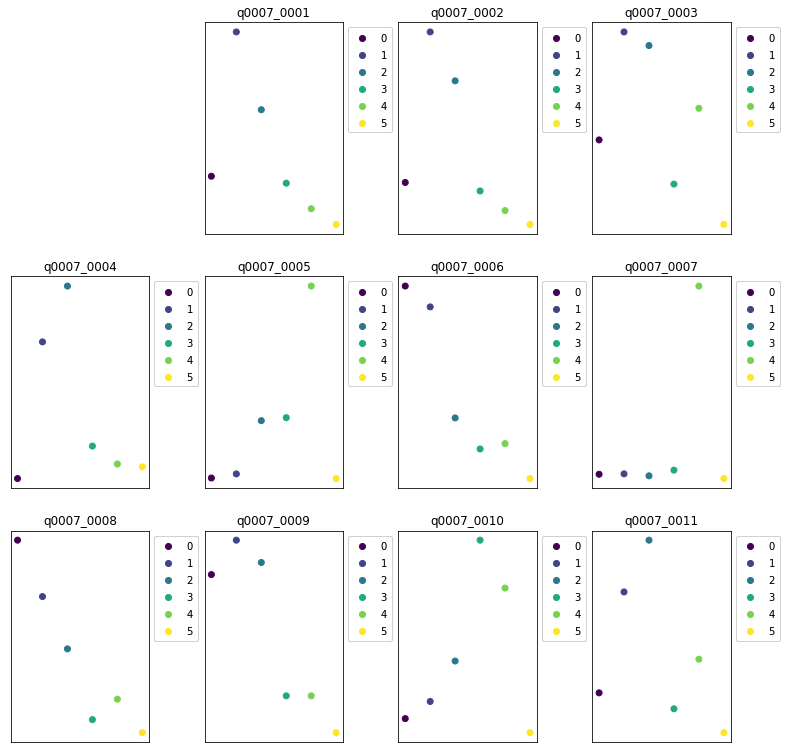

In [12]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.4)

for i in range(1, 12):
    ax = fig.add_subplot(3, 4, i+1, xticks=[], yticks=[])
    scatter = ax.scatter(range(6), survey['q0007_00' + '{:02}'.format(i)].value_counts(sort=False), c=range(6))
    legend = ax.legend(*scatter.legend_elements(), loc='upper right', bbox_to_anchor=(1.39, 1.))
    ax.add_artist(legend)
    ax.title.set_text('q0007_00' + '{:02}'.format(i))
plt.show()

## Building the model

In [13]:
rows_to_cluster = survey.dropna(subset=q0007_cols)
rows_to_cluster

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1185,5/19/18 7:50,5/19/18 8:00,Somewhat masculine,Not at all important,Not selected,Mother or mother figure(s),Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,Non-white,Other,Some college,Some college,35 - 64,No children,Gay/Bisexual,1.571755
1185,1186,5/19/18 7:52,5/19/18 8:03,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Not selected,Not selected,...,New England,Windows Desktop / Laptop,White,White,High school or less,High school or less,35 - 64,Has children,Straight,2.446719
1186,1187,5/19/18 7:58,5/19/18 8:04,Very masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Not selected,Not selected,...,Pacific,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,0.615180
1187,1188,5/19/18 8:52,5/19/18 8:59,Somewhat masculine,Very important,Father or father figure(s),Mother or mother figure(s),Not selected,Pop culture,Not selected,...,Middle Atlantic,iOS Phone / Tablet,Non-white,Other,College or more,College or more,18 - 34,No children,Straight,2.965508


In [14]:
classifier = KMeans()

In [15]:
classifier.fit(rows_to_cluster[q0007_cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
classifier.cluster_centers_

array([[1.25      , 1.31609195, 1.27011494, 1.67241379, 3.25287356,
        0.63218391, 3.92241379, 0.53448276, 0.96264368, 3.06034483,
        1.62068966],
       [1.50724638, 1.49275362, 1.28985507, 2.74637681, 3.33333333,
        0.46376812, 3.9057971 , 1.07246377, 1.11594203, 3.29710145,
        3.65942029],
       [1.41509434, 1.49056604, 2.17924528, 1.87735849, 3.55660377,
        3.66981132, 3.97169811, 1.01886792, 1.54716981, 3.14150943,
        1.93396226],
       [1.79166667, 1.75      , 1.80833333, 1.95      , 3.35833333,
        1.475     , 3.79166667, 2.01666667, 3.61666667, 2.875     ,
        1.5       ],
       [1.19047619, 1.0952381 , 0.63095238, 1.29761905, 3.36904762,
        3.3452381 , 0.73809524, 1.82142857, 1.72619048, 2.53571429,
        1.47619048],
       [3.35087719, 3.43859649, 3.68421053, 3.35087719, 3.89473684,
        2.1754386 , 4.        , 3.01754386, 3.10526316, 3.85964912,
        3.52631579],
       [1.94652406, 2.13368984, 3.7540107 , 2.52406417, 3.

## Separating the cluster members

In [17]:
classifier.labels_

array([4, 3, 1, ..., 6, 6, 5], dtype=int32)

In [18]:
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)

In [19]:
cluster_zero_indices

[8,
 15,
 22,
 23,
 24,
 26,
 28,
 29,
 31,
 34,
 35,
 37,
 42,
 54,
 64,
 66,
 73,
 83,
 86,
 88,
 92,
 100,
 111,
 112,
 113,
 119,
 121,
 123,
 130,
 133,
 135,
 149,
 150,
 159,
 163,
 166,
 169,
 176,
 178,
 180,
 185,
 191,
 192,
 195,
 198,
 202,
 204,
 208,
 210,
 211,
 212,
 216,
 221,
 223,
 226,
 227,
 231,
 233,
 236,
 237,
 238,
 239,
 240,
 245,
 247,
 252,
 259,
 262,
 263,
 265,
 271,
 273,
 275,
 276,
 278,
 279,
 280,
 286,
 300,
 301,
 308,
 313,
 314,
 315,
 320,
 325,
 329,
 330,
 331,
 338,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 350,
 352,
 355,
 358,
 359,
 363,
 373,
 374,
 379,
 382,
 384,
 385,
 386,
 388,
 390,
 393,
 396,
 400,
 403,
 404,
 405,
 408,
 414,
 416,
 418,
 421,
 423,
 431,
 445,
 455,
 462,
 463,
 464,
 465,
 466,
 468,
 469,
 472,
 480,
 481,
 482,
 483,
 484,
 488,
 489,
 492,
 493,
 496,
 498,
 500,
 509,
 512,
 515,
 516,
 524,
 532,
 533,
 534,
 535,
 536,
 539,
 540,
 551,
 552,
 558,
 559,
 562,
 563,
 564,
 565,
 566,
 573,
 5

In [20]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

In [21]:
cluster_zero_df['educ4'].value_counts(sort=False) / len(cluster_zero_df)

Post graduate degree    0.362069
College or more         0.353448
High school or less     0.080460
Some college            0.204023
Name: educ4, dtype: float64

In [22]:
cluster_one_df['educ4'].value_counts(sort=False) / len(cluster_one_df)

Post graduate degree    0.318841
Some college            0.275362
College or more         0.376812
High school or less     0.028986
Name: educ4, dtype: float64

In [23]:
cluster_zero_df['age3'].value_counts(sort=False) / len(cluster_zero_df)

65 and up    0.459770
35 - 64      0.488506
18 - 34      0.051724
Name: age3, dtype: float64

In [24]:
cluster_one_df['age3'].value_counts(sort=False) / len(cluster_one_df)

65 and up    0.579710
35 - 64      0.376812
18 - 34      0.043478
Name: age3, dtype: float64

In [25]:
cluster_zero_df['q0026'].value_counts(sort=False) / len(cluster_zero_df)

No answer    0.002874
Other        0.011494
Bisexual     0.022989
Straight     0.959770
Gay          0.002874
Name: q0026, dtype: float64

In [26]:
cluster_one_df['q0026'].value_counts(sort=False) / len(cluster_one_df)

Other        0.007246
No answer    0.014493
Bisexual     0.036232
Straight     0.942029
Name: q0026, dtype: float64

In [27]:
cluster_zero_df['q0028'].value_counts(sort=False) / len(cluster_zero_df)

Black       0.043103
Other       0.063218
Hispanic    0.020115
White       0.847701
Asian       0.025862
Name: q0028, dtype: float64

In [28]:
cluster_one_df['q0028'].value_counts(sort=False) / len(cluster_one_df)

Asian       0.014493
Other       0.072464
Hispanic    0.043478
White       0.869565
Name: q0028, dtype: float64

In [29]:
cluster_zero_df['q0036'].value_counts(sort=False) / len(cluster_zero_df)

Android Phone / Tablet      0.117816
iOS Phone / Tablet          0.195402
Other                       0.022989
Windows Desktop / Laptop    0.537356
MacOS Desktop / Laptop      0.126437
Name: q0036, dtype: float64

In [30]:
cluster_one_df['q0036'].value_counts(sort=False) / len(cluster_one_df)

iOS Phone / Tablet          0.202899
Other                       0.007246
Android Phone / Tablet      0.050725
Windows Desktop / Laptop    0.652174
MacOS Desktop / Laptop      0.086957
Name: q0036, dtype: float64

From the results, we can conclude that the feeling of masculinity is often related to the age and the education level.

In [ ]:
s